In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,mean_absolute_percentage_error

In [5]:
powerplus = pd.read_csv("C:/Users/HP/Desktop/kani/Data_science/guvi/Project/Powerplus/individual+household+electric+power+consumption (1)/household_power_consumption.txt",
                  sep = ';', low_memory=False)
powerplus.shape

(2075259, 9)

In [7]:
powerplus.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
powerplus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


EDA Process / Data Preprocessing
changing the datatypes

In [11]:
powerplus['Datetime'] = pd.to_datetime(
    powerplus['Date'] + ' ' + powerplus['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

In [13]:
powerplus.drop(['Time','Date'], axis=1, inplace=True)
powerplus.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00


In [15]:
powerplus['Global_active_power'] = pd.to_numeric(powerplus['Global_active_power'], errors='coerce')
powerplus['Global_reactive_power'] = pd.to_numeric(powerplus['Global_reactive_power'], errors='coerce')
powerplus['Voltage'] = pd.to_numeric(powerplus['Voltage'], errors='coerce')
powerplus['Sub_metering_1'] = pd.to_numeric(powerplus['Sub_metering_1'], errors='coerce')
powerplus['Sub_metering_2'] = pd.to_numeric(powerplus['Sub_metering_2'], errors='coerce')
powerplus['Global_intensity'] = pd.to_numeric(powerplus['Global_intensity'], errors='coerce')

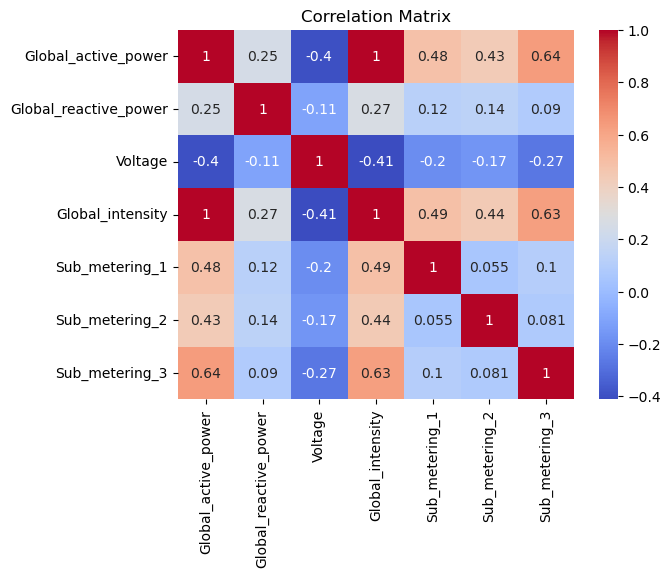

In [70]:
# Correlation Matrix
correlation_matrix = powerplus.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [101]:
#validating datatype changes
powerplus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [103]:
#handling missing values:
powerplus.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [17]:
# Impute missing values in numerical columns with the median

columns_to_impute = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Loop through each column and apply median imputation
for column in columns_to_impute:
    median_value = powerplus[column].median() 
    powerplus[column].fillna(median_value, inplace= True)  # Fill missing values with the median

# Check for remaining missing values (should be 0 if all were filled)
print(powerplus.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_8580\1337800437.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  powerplus[column].fillna(median_value, inplace= True)  # Fill missing values with the median


In [107]:
powerplus.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2075259
mean,1.085486e+00,1.234176e-01,2.408420e+02,4.602375e+00,1.107879e+00,1.282265e+00,6.390116e+00,2008-12-06 07:12:59.999994112
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00
std,1.052065e+00,1.120452e-01,3.219699e+00,4.422241e+00,6.115669e+00,5.787271e+00,8.406114e+00,NaN


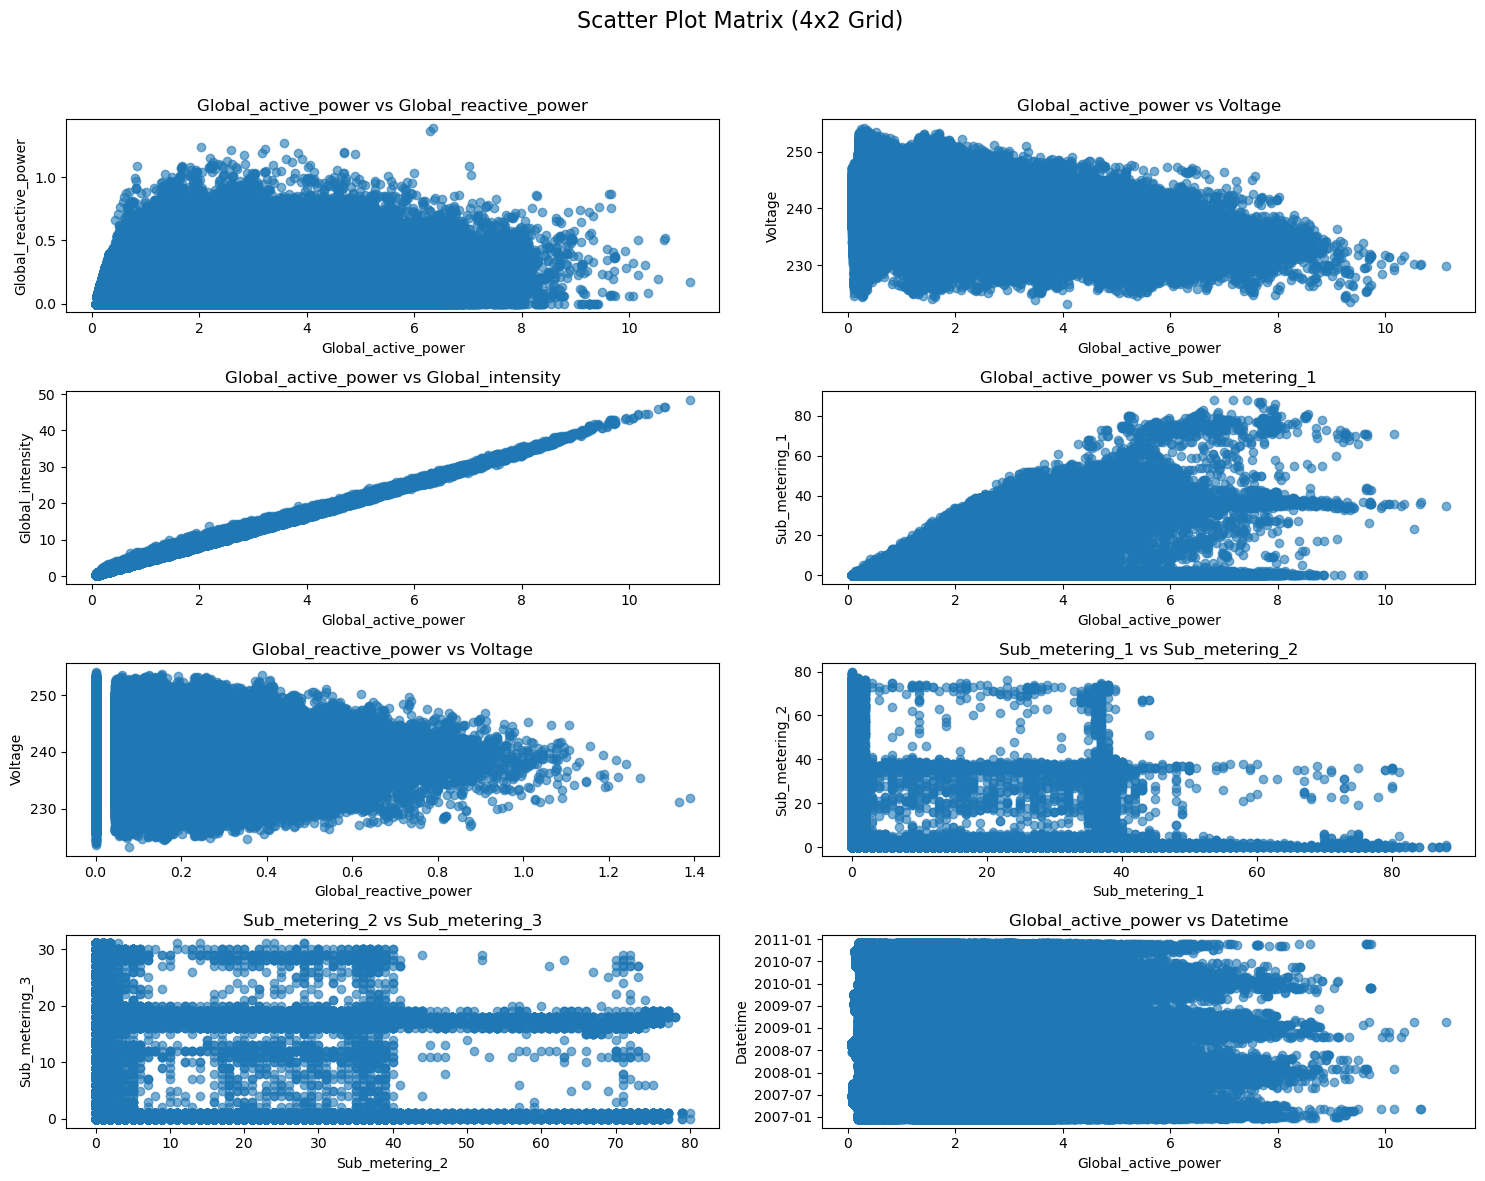

In [109]:
columns1 = ['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Voltage','Sub_metering_2','Sub_metering_3','Datetime']
columns = ['Global_active_power','Global_active_power','Global_active_power','Global_active_power','Global_reactive_power','Sub_metering_1',
           'Sub_metering_2','Global_active_power']

# Create a 3x2 grid of scatter plots
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
fig.suptitle("Scatter Plot Matrix (4x2 Grid)", fontsize=16)

# Iterate over rows and columns of the grid
for i, ax in enumerate(axes.flat):
    if i < len(columns):
        x_col = columns[i]
        y_col = columns1[i]
        
        # Scatter plot for each pair
        ax.scatter(powerplus[x_col], powerplus[y_col], alpha=0.6)
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_title(f"{x_col} vs {y_col}")

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Identifying and treating the outliers

In [19]:
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                  'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
outlier_summary = []

for col in numerical_cols:
    Q1 = powerplus[col].quantile(0.25)
    Q3 = powerplus[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count how many outliers
    outlier_count = ((powerplus[col] < lower_bound) | (powerplus[col] > upper_bound)).sum()
    total_rows = len(powerplus)
    outlier_percent = (outlier_count / total_rows) * 100
    
    outlier_summary.append({
        'Column': col,
        'Outlier_Count': outlier_count,
        'Outlier_%': round(outlier_percent, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

                  Column  Outlier_Count  Outlier_%
0    Global_active_power          96742       4.66
1  Global_reactive_power          42234       2.04
2                Voltage          54737       2.64
3       Global_intensity         100961       4.86
4         Sub_metering_1         169105       8.15
5         Sub_metering_2          77151       3.72
6         Sub_metering_3              0       0.00


In [21]:
cleaned_powerplus = powerplus.copy()

for col in numerical_cols:
    Q1 = cleaned_powerplus[col].quantile(0.25)
    Q3 = cleaned_powerplus[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cleaned_powerplus = cleaned_powerplus[(cleaned_powerplus[col] >= lower) & (cleaned_powerplus[col] <= upper)]

print("Original shape:", powerplus.shape)
print("After removing outliers:", cleaned_powerplus.shape)


Original shape: (2075259, 8)
After removing outliers: (1739080, 8)


Feature Engineering

In [23]:
# Extract date and time features
powerplus['hour'] = powerplus['Datetime'].dt.hour
powerplus['day_of_week'] = powerplus['Datetime'].dt.dayofweek
powerplus['year'] = powerplus['Datetime'].dt.year

In [25]:
# Total energy consumption
powerplus['total_energy'] = powerplus['Sub_metering_1'] + powerplus['Sub_metering_2'] + powerplus['Sub_metering_3']

# Proportion of energy consumption for each sub-metering area
powerplus['Sub_metering_1_ratio'] = powerplus['Sub_metering_1'] / powerplus['total_energy']
powerplus['Sub_metering_2_ratio'] = powerplus['Sub_metering_2'] / powerplus['total_energy']
powerplus['Sub_metering_3_ratio'] = powerplus['Sub_metering_3'] / powerplus['total_energy']

# Dealing with nan values
powerplus['Sub_metering_1_ratio'] = powerplus['Sub_metering_1'].fillna(0.0)
powerplus['Sub_metering_2_ratio'] = powerplus['Sub_metering_2'].fillna(0.0)
powerplus['Sub_metering_3_ratio'] = powerplus['Sub_metering_3'].fillna(0.0)
powerplus.info()
powerplus.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
 8   hour                   int32         
 9   day_of_week            int32         
 10  year                   int32         
 11  total_energy           float64       
 12  Sub_metering_1_ratio   float64       
 13  Sub_metering_2_ratio   float64       
 14  Sub_metering_3_ratio   float64       
dtypes: datetime64[ns](1), float64(11), int32(3)
memory usage: 213.7 MB


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
hour                     0
day_of_week              0
year                     0
total_energy             0
Sub_metering_1_ratio     0
Sub_metering_2_ratio     0
Sub_metering_3_ratio     0
dtype: int64

#Scalling the Features

In [27]:

scaler = StandardScaler()
features_to_scale = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                     'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3','total_energy',
                     'Sub_metering_1_ratio','Sub_metering_2_ratio','Sub_metering_3_ratio']
powerplus[features_to_scale] = scaler.fit_transform(powerplus[features_to_scale]) 

Spliting the dataset

In [29]:
y = powerplus[['Global_active_power']]
X = powerplus.drop({'Global_active_power','Datetime'}, axis=1)

In [31]:
print(f"X:{X.shape}")
print(f"y:{y.shape}")

X:(2075259, 13)
y:(2075259, 1)


In [33]:
#Splitting train and test as 70-30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"train:{X_train.shape}")
print(f"test:{X_test.shape}")

train:(1452681, 13)
test:(622578, 13)


Model Building using linear regression

In [35]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Print the evaluation metrics for the training set
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R-squared (R²): {r2_train}")

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R-squared (R²): {r2_test}")

Training Set Evaluation:
Mean Absolute Error (MAE): 0.02423912166623814
Mean Squared Error (MSE): 0.0014589191238894921
Root Mean Squared Error (RMSE): 0.03819579981999974
R-squared (R²): 0.9985403779499633

Test Set Evaluation:
Mean Absolute Error (MAE): 0.02429122822963042
Mean Squared Error (MSE): 0.001475423997157579
Root Mean Squared Error (RMSE): 0.03841124831553355
R-squared (R²): 0.9985262318301402


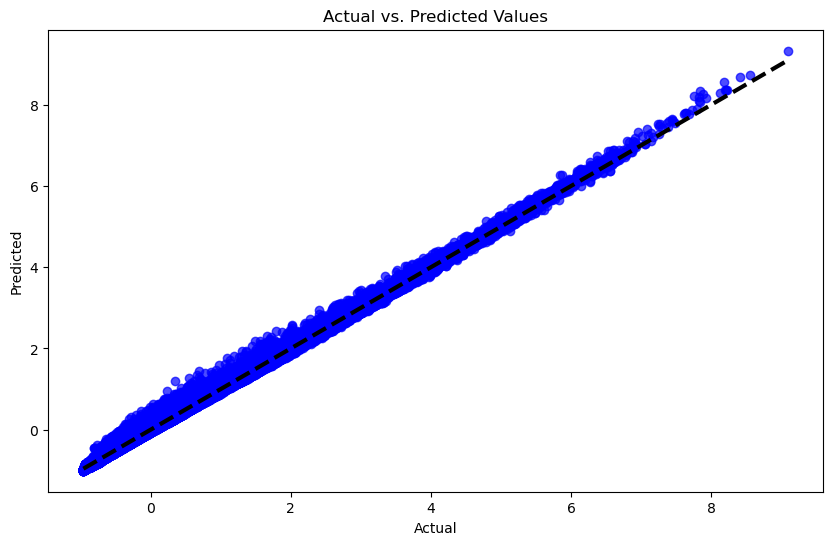

In [167]:
# Actual vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

"The Actual vs. Predicted plot indicates that the model achieves a strong fit to the data. The alignment of points along the diagonal confirms that the regression model has effectively captured the relationship between the input features and the target variable, demonstrating high accuracy and consistent performance across the data range."

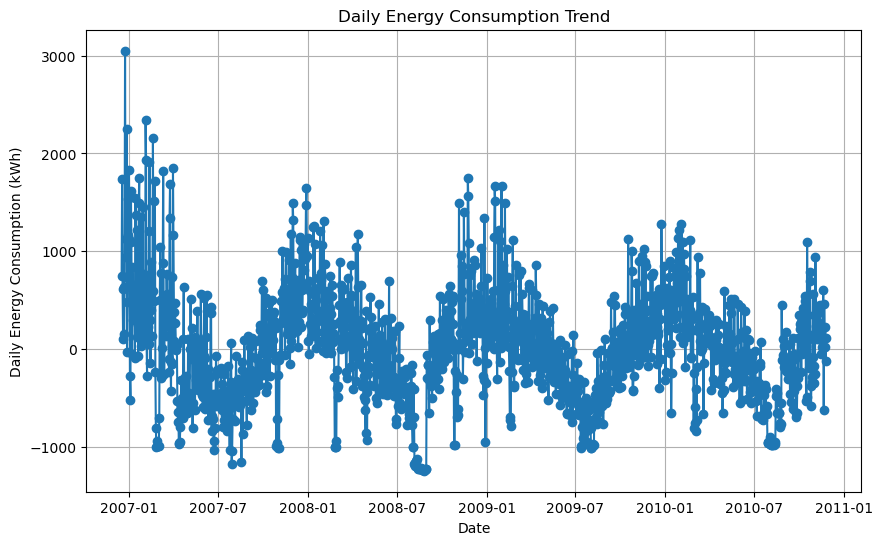

In [173]:
#Aggregate data by day
daily_consumption = powerplus.groupby(powerplus['Datetime'].dt.date)['Global_active_power'].sum()

# Plot daily energy consumption
plt.figure(figsize=(10, 6))
plt.plot(daily_consumption.index, daily_consumption.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (kWh)')
plt.title('Daily Energy Consumption Trend')
plt.grid(True)
plt.show()

"The energy usage goes up and down at certain times of the year, showing seasonal patterns. Some days have big spikes in usage. There are also some negative values, which might happen if energy is being produced (like from solar panels) or corrected in the meter. Overall, the usage changes over the years, with some periods being more stable or lower."

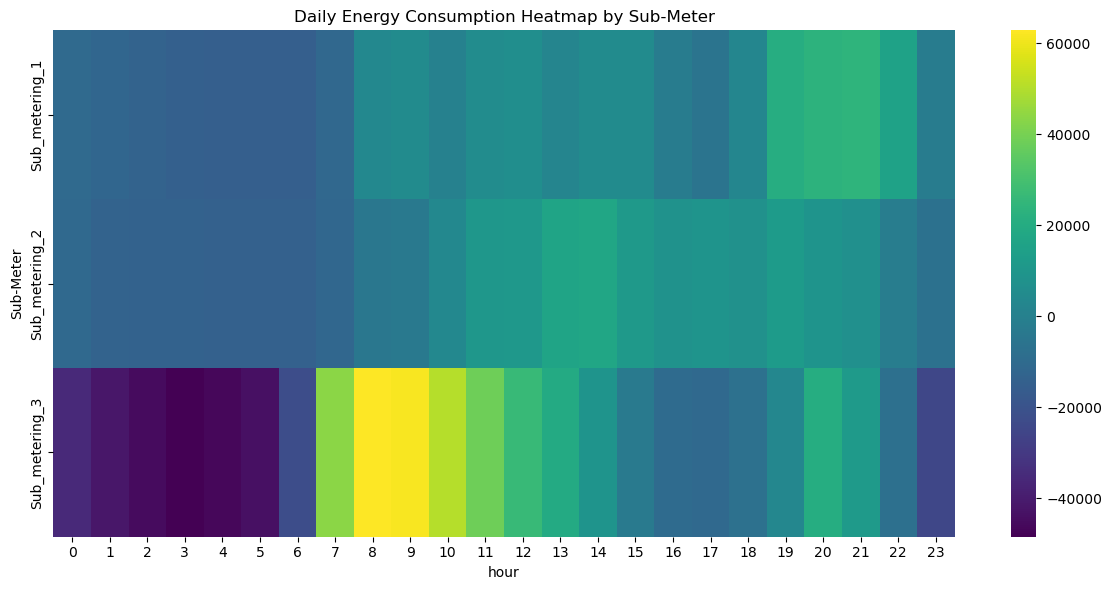

In [177]:
# Aggregate by day and sum sub-metering columns
powerplus_daily = powerplus.groupby(powerplus['Datetime'].dt.hour)[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()

# Transpose for heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(powerplus_daily.T, cmap='viridis', annot=False, cbar=True)

# Add title and labels
plt.title('Daily Energy Consumption Heatmap by Sub-Meter')
plt.xlabel('hour')
plt.ylabel('Sub-Meter')
plt.tight_layout()
plt.show()

"Energy usage is highest in the morning (6 AM – 9 AM) and moderately high in the evening (6 PM – 9 PM). The heatmap also shows some negative values, which could be due to dataset errors or meter calibration issues. These should be checked to ensure accurate energy tracking."

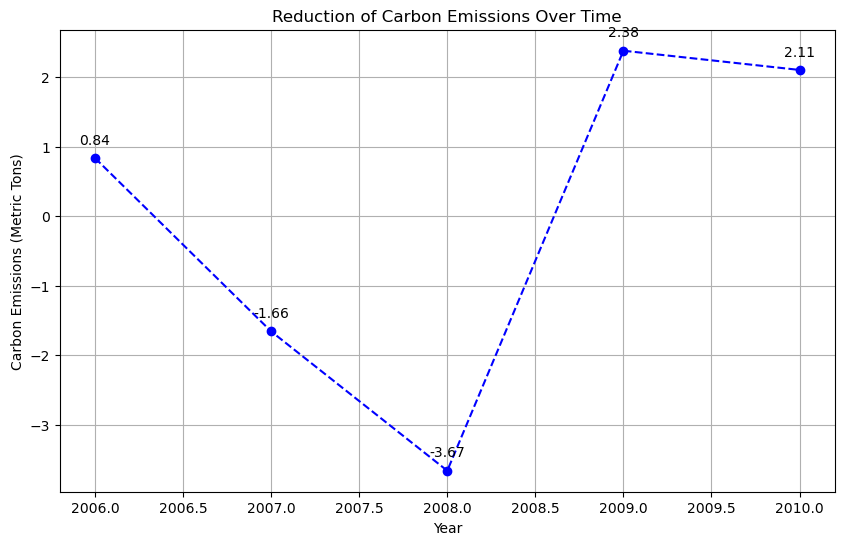

In [39]:
df = powerplus
# Estimate carbon emissions (assuming 0.233 kg of CO2 per kWh as an example conversion factor)
df['carbon_emissions'] = df['total_energy'] * 0.233

# Aggregate carbon emissions by year
annual_emissions = df.groupby('year')['carbon_emissions'].sum().reset_index()

# Convert carbon emissions to metric tons
annual_emissions['carbon_emissions'] = annual_emissions['carbon_emissions'] / 1000

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(annual_emissions['year'], annual_emissions['carbon_emissions'], marker='o', color='b', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions (Metric Tons)')
plt.title('Reduction of Carbon Emissions Over Time')
plt.grid(True)

# Annotate points with carbon savings
for i, txt in enumerate(annual_emissions['carbon_emissions']):
    plt.annotate(f'{txt:.2f}', (annual_emissions['year'][i], annual_emissions['carbon_emissions'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

The plot highlights significant variations in carbon emissions across years, with notable reductions and increases. For example, emissions dropped drastically between 2006 and 2007 but rebounded after 2008. These fluctuations indicate changes in energy consumption patterns, possibly due to seasonality, energy-saving measures, or changes in household behavior.